<iframe title="Project dashboard" width="600" height="373.5" src="https://app.powerbi.com/view?r=eyJrIjoiMmUwZWIwNzktMTlmYy00N2VlLWFiNWMtMGI3MzExZDNhMjY5IiwidCI6IjE2ZDgzZWU2LTI1NGEtNDY5ZC1hNmNjLTU0ZTJjYTIzMTNlNyIsImMiOjh9" frameborder="0" allowFullScreen="true"></iframe>

In [ ]:
# Cell 1: Data Loading and Preprocessing (Colab Compatible)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

print("--- Data Loading and Preprocessing ---")


try:
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0] # Gets the name of the first uploaded file
    df = pd.read_csv(io.BytesIO(uploaded[file_name]))
    print(f"File '{file_name}' loaded successfully.")
except Exception as e:
    print(f"Error loading file: {e}")
    print("Please upload your CSV file when prompted. If no prompt, restart runtime and try again.")
    # Fallback for demonstration if file upload fails (you should remove this in production)
    print("Using dummy data for demonstration. Please upload your actual CSV.")
    csv_data = """ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),Ad Impressions,Estimated AdSense Revenue (USD),DoubleClick Revenue (USD),YouTube Ads Revenue (USD),Watch Page Ads Revenue (USD),YouTube†Premium (USD),New Comments,Shares,Like Rate (%),Dislikes,Likes,Unsubscribes,New Subscribers,End Screen Click-Through Rate (%),End Screen Impressions,End Screen Clicks,Teaser Click-Through Rate (%),Teaser Impressions,Teaser Clicks,Card Click-Through Rate (%),Card Impressions,Card Clicks,Views per Playlist Start,Playlist Views,Playlist Watch Time (hours),Clip Watch Time (hours),Clip Views,YouTube Premium Watch Time (hours),YouTube Premium Views,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,201,02/06/2016,0,2,6,2016,Thursday,0.024,723,1.386,1.021,981,0.527,0.024,1.002,0.551,0.01,91,12,96.86,30,924,3,54,4.35,46,2,0,0,0,0,0,0,3.3333,10,0.2974,0.1575,10,2.5358,152,0,0,40.38,81,23531,533.1636,51,0.561,41118,27.66
1,391,10/06/2016,8,10,6,2016,Friday,0.056,727,1.612,1.361,861,0.635,0.009,1.172,0.645,0.004,35,5,94.71,18,322,1,34,0,0,0,0,0,0,0,0,0,3.5,7,0.5187,0,0,0.8911,32,0,0,39.85,156,11478,500.5628,33,0.648,41627,5.85
2,133,14/06/2016,4,14,6,2016,Tuesday,0.014,76,2.105,1.818,88,0.088,0,0.16,0.088,0.001,0,4,92.28,20,239,0,8,0,0,0,0,0,0,0,0,0,0,11,0.1683,0,0,0.1838,28,0,0,30.88,41,6153,70.7287,8,0.089,38713,7.07
"""
    df = pd.read_csv(io.StringIO(csv_data))


print("\nOriginal columns:")
print(df.columns.tolist())

# Clean column names (remove special characters and standardize spaces)
df.columns = df.columns.str.replace(r'[^\w\s%]', '', regex=True).str.strip().str.replace(r'\s+', '_', regex=True)

# Correct a specific column name if it didn't get parsed correctly from the special character
if 'YouTubePremium_USD' not in df.columns and 'YouTube_Premium_USD' not in df.columns:
    if any('YouTube' in col and 'Premium' in col for col in df.columns):
        problem_col = [col for col in df.columns if 'YouTube' in col and 'Premium' in col][0]
        df.rename(columns={problem_col: 'YouTube_Premium_USD'}, inplace=True)


print("\nCleaned column names:")
print(df.columns.tolist())

# Drop irrelevant columns
# 'ID' is usually just an identifier and not a predictive feature.
# 'Video_Publish_Time' is handled by 'Day', 'Month', 'Year', 'Days_Since_Publish'.
df = df.drop(['ID', 'Video_Publish_Time'], axis=1)

# Target variable
target_variable = 'Views'
y = df[target_variable]
X = df.drop(target_variable, axis=1)

print(f"\nTarget variable '{target_variable}' isolated.")
print("Applying Label Encoding for 'Day_of_Week'...")

# Apply Label Encoding to 'Day_of_Week'
le = LabelEncoder()
X['Day_of_Week'] = le.fit_transform(X['Day_of_Week'])

# Check for and handle any potential missing values (imputation with median for numerical columns)
# This is a robust approach as median is less sensitive to outliers than mean.
for col in X.select_dtypes(include=np.number).columns:
    if X[col].isnull().any():
        median_val = X[col].median()
        X[col] = X[col].fillna(median_val)
        print(f"Filled missing values in '{col}' with median: {median_val}")


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData Preprocessing Complete.")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Training features (X_train) shape: {X_train.shape}")
print(f"Testing features (X_test) shape: {X_test.shape}")
print("\nFirst 5 rows of preprocessed X_train (after Label Encoding & NaN handling):")
print(X_train.head())

--- Data Loading and Preprocessing ---


Saving Claned data.csv to Claned data.csv
File 'Claned data.csv' loaded successfully.

Original columns:
['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish', 'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)', 'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)', 'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)', 'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)', 'Watch Page Ads Revenue (USD)', 'YouTube\xa0Premium (USD)', 'New Comments', 'Shares', 'Like Rate (%)', 'Dislikes', 'Likes', 'Unsubscribes', 'New Subscribers', 'End Screen Click-Through Rate (%)', 'End Screen Impressions', 'End Screen Clicks', 'Teaser Click-Through Rate (%)', 'Teaser Impressions', 'Teaser Clicks', 'Card Click-Through Rate (%)', 'Card Impressions', 'Card Clicks', 'Views per Playlist Start', 'Playlist Views', 'Playlist Watch Time (hours)', 'Clip Watch Time (hours)', 'Clip Views', 'YouTube Premium Watch Time (hours)', 'YouTube Premium Views', 'Watche

In [ ]:
from sklearn.decomposition import PCA

# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA (keep enough components to explain ~95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {np.sum(pca.explained_variance_ratio_):.2f}")

# Show feature contributions to principal components
pca_components = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

print("\nTop contributing features for each principal component:")
for pc in pca_components.index:
    print(f"\n{pc}:")
    print(pca_components.loc[pc].sort_values(ascending=False).head(5))


Explained variance ratio: [0.25294251 0.12845606 0.09200917 0.0608556  0.04647482 0.04166317
 0.03546514 0.03294886 0.03021298 0.0266457  0.02379369 0.02216666
 0.02058547 0.01977563 0.01783539 0.0175624  0.01611455 0.01491406
 0.01337845 0.01226601 0.01134201 0.00945808 0.00707499]
Total variance explained: 0.95

Top contributing features for each principal component:

PC1:
YouTube_Premium_Views               0.253701
YouTube_Premium_Watch_Time_hours    0.244371
Estimated_Revenue_USD               0.229976
Likes                               0.228443
Estimated_AdSense_Revenue_USD       0.228373
Name: PC1, dtype: float64

PC2:
Dislikes            0.291486
New_Comments        0.260314
Views               0.258681
Watch_Time_hours    0.200338
Likes               0.185824
Name: PC2, dtype: float64

PC3:
PlaybackBased_CPM_USD         0.275140
Revenue_per_1000_Views_USD    0.263975
YouTube_Ads_Revenue_USD       0.232418
Watch_Page_Ads_Revenue_USD    0.232277
Estimated_Revenue_USD         0.



*   List item
*   List item



random forest



Feature importance for Impressions:
Views                               0.301575
Watch_Time_hours                    0.220711
Likes                               0.150634
Unsubscribes                        0.040990
New_Subscribers                     0.037537
Video_Thumbnail_CTR_%               0.030158
YouTube_Premium_Views               0.025769
YouTube_Premium_Watch_Time_hours    0.022192
YouTube_Ads_Revenue_USD             0.019156
Watch_Page_Ads_Revenue_USD          0.016164
dtype: float64


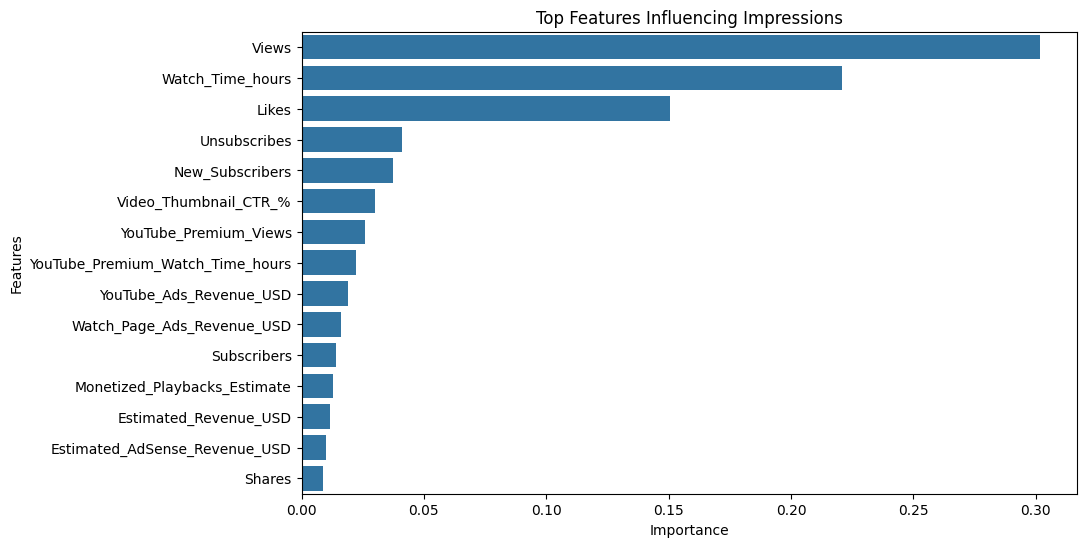

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest for feature importance (Impressions)
rf_impressions = RandomForestRegressor(n_estimators=200, random_state=42)

# Make sure to run the first cell to define X_train and y_train
rf_impressions.fit(X_train, y_train)

# Feature importance ranking
importances = pd.Series(rf_impressions.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

print("\nFeature importance for Impressions:")
print(importances_sorted.head(10))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances_sorted.head(15), y=importances_sorted.head(15).index)
plt.title("Top Features Influencing Impressions")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
views featuure importance


Feature importance for Impressions:
Watch_Time_hours             0.686246
Impressions                  0.121547
Likes                        0.036449
Playlist_Watch_Time_hours    0.025980
Shares                       0.025383
Dislikes                     0.025251
Playlist_Views               0.010900
Views_per_Playlist_Start     0.009438
Average_View_Duration        0.008869
Subscribers                  0.006213
dtype: float64


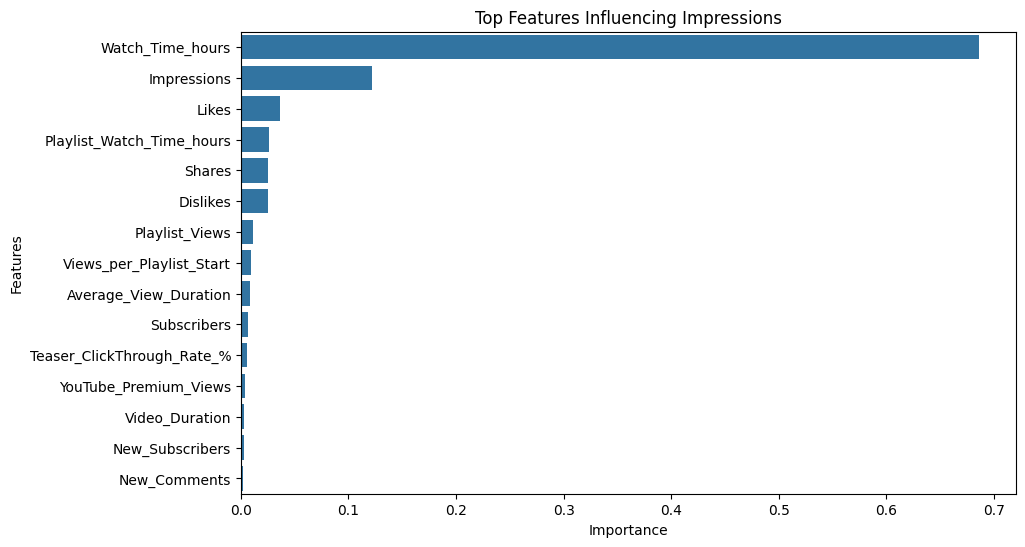

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest for feature importance (Impressions)
rf_impressions = RandomForestRegressor(n_estimators=200, random_state=42)

# Make sure to run the first cell to define X_train and y_train
rf_impressions.fit(X_train, y_train)

# Feature importance ranking
importances = pd.Series(rf_impressions.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

print("\nFeature importance for Impressions:")
print(importances_sorted.head(10))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances_sorted.head(15), y=importances_sorted.head(15).index)
plt.title("Top Features Influencing Impressions")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()



*   List item
*   List item





*   List item
*   List item




--- Running Principal Component Analysis (PCA) with Top 15 Components ---
Original X_train shape: (291, 48)
PCA-transformed X_train shape (keeping 15 components): (291, 15)

Explained Variance Ratio for the top 15 Principal Components:
PC 1: 0.2549 (Cumulative: 0.2549)
PC 2: 0.1288 (Cumulative: 0.3837)
PC 3: 0.0936 (Cumulative: 0.4773)
PC 4: 0.0612 (Cumulative: 0.5384)
PC 5: 0.0465 (Cumulative: 0.5849)
PC 6: 0.0419 (Cumulative: 0.6269)
PC 7: 0.0359 (Cumulative: 0.6628)
PC 8: 0.0323 (Cumulative: 0.6951)
PC 9: 0.0312 (Cumulative: 0.7263)
PC 10: 0.0268 (Cumulative: 0.7530)
PC 11: 0.0238 (Cumulative: 0.7768)
PC 12: 0.0223 (Cumulative: 0.7991)
PC 13: 0.0207 (Cumulative: 0.8198)
PC 14: 0.0191 (Cumulative: 0.8389)
PC 15: 0.0178 (Cumulative: 0.8567)

Total variance explained by 15 components: 0.8567


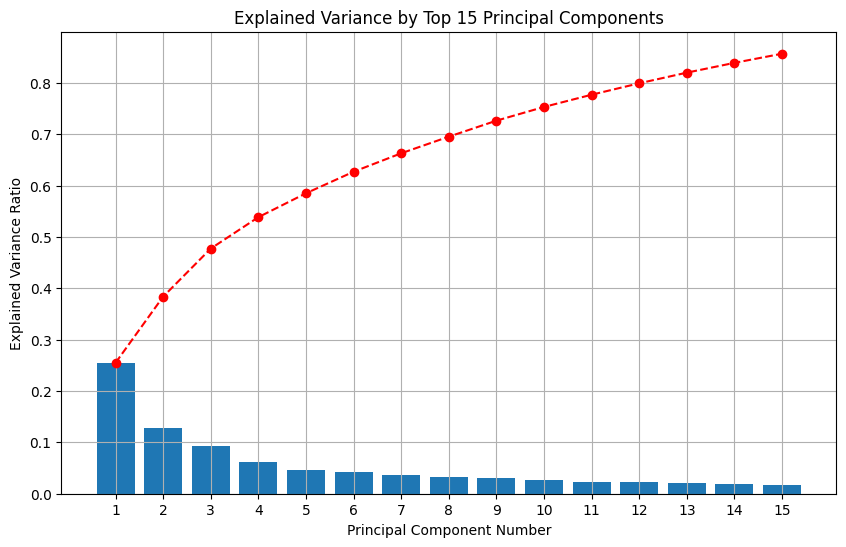


Top 5 original features contributing to each of the first 3 Principal Components:

PC 1 Loadings (Top 5 Absolute Values):
YouTube_Premium_Views               0.252453
YouTube_Premium_Watch_Time_hours    0.244339
Estimated_Revenue_USD               0.232029
Estimated_AdSense_Revenue_USD       0.231072
Watch_Page_Ads_Revenue_USD          0.229087
dtype: float64
--------------------

PC 2 Loadings (Top 5 Absolute Values):
Dislikes                  0.294832
New_Comments              0.269454
Views                     0.264179
Year                      0.256576
End_Screen_Impressions    0.220105
dtype: float64
--------------------

PC 3 Loadings (Top 5 Absolute Values):
Revenue_per_1000_Views_USD    0.280906
PlaybackBased_CPM_USD         0.275136
Teaser_Clicks                 0.230761
YouTube_Ads_Revenue_USD       0.229232
Watch_Page_Ads_Revenue_USD    0.229057
dtype: float64
--------------------


In [ ]:
# Cell 5: Principal Component Analysis (PCA) - Top 15 Components

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # Already imported, but good to ensure
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Running Principal Component Analysis (PCA) with Top 15 Components ---")

# PCA is sensitive to feature scaling, so we'll scale the data first.
# We'll use the scaler fitted on X_train from the SVR cell (or re-initialize if this is run independently).
# To ensure consistency and avoid data leakage, fit scaler only on training data.

# If you're running this cell out of order, ensure X_train is defined from Cell 1.
# (X_train should be available if Cell 1 has been executed)

scaler_pca = StandardScaler()
X_train_scaled_for_pca = scaler_pca.fit_transform(X_train)
X_test_scaled_for_pca = scaler_pca.transform(X_test)

# Initialize PCA to retain exactly 15 components
n_components_to_keep = 15
pca_final = PCA(n_components=n_components_to_keep)

# Fit PCA on the scaled training data and transform both training and test data
X_train_pca = pca_final.fit_transform(X_train_scaled_for_pca)
X_test_pca = pca_final.transform(X_test_scaled_for_pca)

print(f"Original X_train shape: {X_train.shape}")
print(f"PCA-transformed X_train shape (keeping {n_components_to_keep} components): {X_train_pca.shape}")

# Calculate and print explained variance ratio for the 15 components
explained_variance_ratio = pca_final.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print(f"\nExplained Variance Ratio for the top {n_components_to_keep} Principal Components:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC {i+1}: {ratio:.4f} (Cumulative: {cumulative_explained_variance[i]:.4f})")

print(f"\nTotal variance explained by {n_components_to_keep} components: {cumulative_explained_variance[-1]:.4f}")


# Plot Explained Variance Ratio for the 15 components
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components_to_keep + 1), explained_variance_ratio)
plt.plot(range(1, n_components_to_keep + 1), cumulative_explained_variance, color='red', marker='o', linestyle='--')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title(f'Explained Variance by Top {n_components_to_keep} Principal Components')
plt.xticks(range(1, n_components_to_keep + 1))
plt.grid(True)
plt.show()


# Optional: Examine the loadings (pca_final.components_ attribute) to see how original features contribute to each PC
# This part is more complex as it relates scaled features to components.
# You can visualize this for the first few components to get an idea.
print("\nTop 5 original features contributing to each of the first 3 Principal Components:")
for i in range(min(3, n_components_to_keep)): # Check up to first 3 PCs or fewer if less than 3 components
    pc_loadings = pd.Series(pca_final.components_[i], index=X_train.columns)
    print(f"\nPC {i+1} Loadings (Top 5 Absolute Values):")
    print(pc_loadings.abs().sort_values(ascending=False).head())
    print("--------------------")

# You can now use X_train_pca and X_test_pca for training your models.
# The following cells for Decision Tree, XGBoost, and SVR would then use these PCA-transformed datasets.
# Remember to compare performance with and without PCA.


--- Running Decision Tree Regressor ---
Decision Tree MSE: 141308933730.26
Decision Tree R-squared: 0.87

Decision Tree Feature Importance (Top 10):
                         feature  importance
44              Watch_Time_hours    0.462497
13       YouTube_Ads_Revenue_USD    0.236842
20                         Likes    0.116559
38         YouTube_Premium_Views    0.063376
7   Monetized_Playbacks_Estimate    0.029109
22               New_Subscribers    0.020483
43                         Views    0.018872
47         Video_Thumbnail_CTR_%    0.018592
9                        CPM_USD    0.008516
21                  Unsubscribes    0.004391


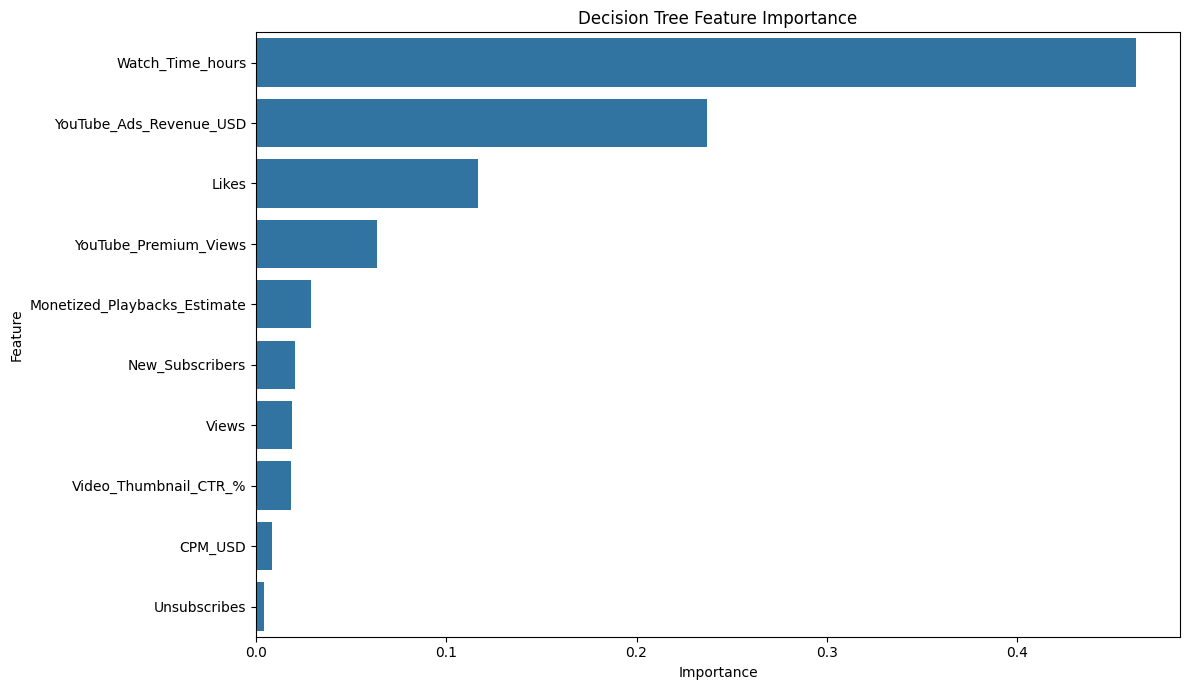

In [ ]:
# Cell 2: Decision Tree Regressor (Colab Compatible)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("\n--- Running Decision Tree Regressor ---")

# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mse_dt:.2f}")
print(f"Decision Tree R-squared: {r2_dt:.2f}")

# Feature Importance for Decision Tree
feature_importances_dt = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nDecision Tree Feature Importance (Top 10):")
print(feature_importances_dt.head(10))

# Visualize Feature Importance
plt.figure(figsize=(12, 7))
sns.barplot(x='importance', y='feature', data=feature_importances_dt.head(10))
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# To understand relations:
# The feature importance gives you a direct ranking of how much each feature contributes to the decision-making process of the tree.
# Higher importance means a stronger influence on predicting 'Impressions'.
# Pay close attention to 'Ad_Impressions' and how it ranks against other features.


--- Running XGBoost Regressor ---
XGBoost MSE: 70159296305.14
XGBoost R-squared: 0.94

XGBoost Feature Importance (Top 10):
                         feature  importance
44              Watch_Time_hours    0.453011
20                         Likes    0.136726
7   Monetized_Playbacks_Estimate    0.092896
43                         Views    0.060042
22               New_Subscribers    0.058899
47         Video_Thumbnail_CTR_%    0.037874
21                  Unsubscribes    0.030023
45                   Subscribers    0.026926
17                        Shares    0.026618
38         YouTube_Premium_Views    0.017248


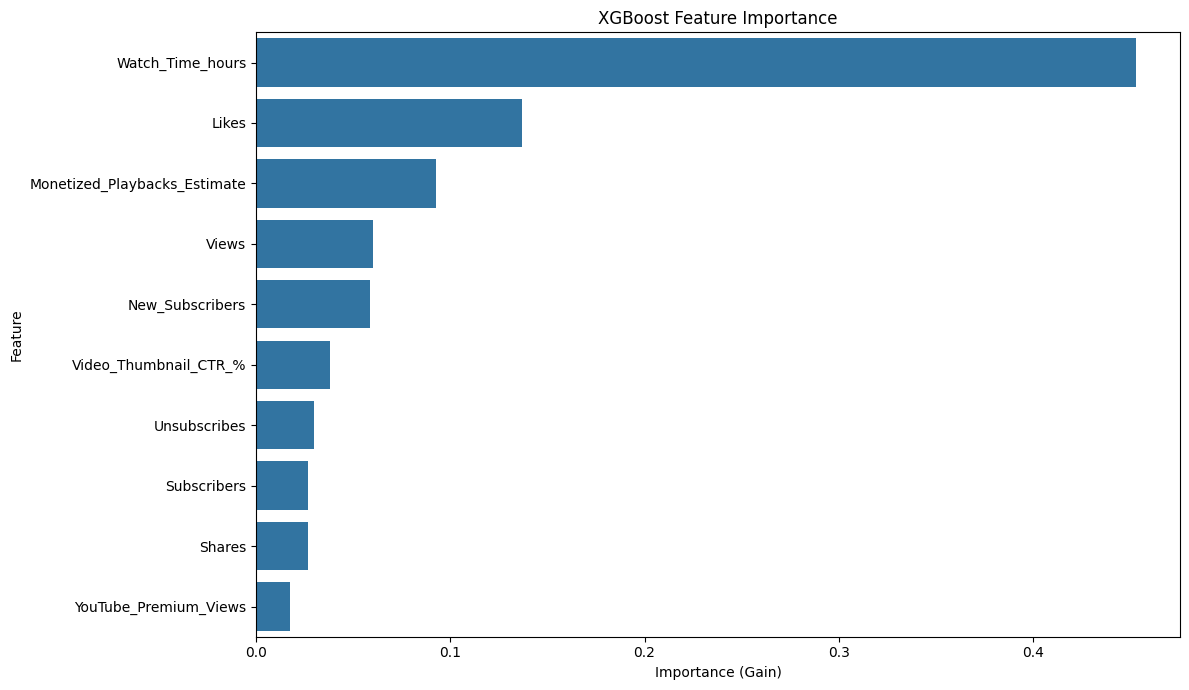

In [ ]:
# Cell 3: XGBoost Regressor (Colab Compatible)

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

print("\n--- Running XGBoost Regressor ---")

# Initialize and train XGBoost Regressor
# No explicit scaling is needed for tree-based models like XGBoost.
xgbr_model = xgb.XGBRegressor(objective='reg:squarederror', # Specifies regression task
                              n_estimators=100,           # Number of boosting rounds
                              learning_rate=0.1,          # Step size shrinkage
                              max_depth=5,                # Maximum depth of a tree
                              random_state=42)

xgbr_model.fit(X_train, y_train)

# Make predictions
y_pred_xgbr = xgbr_model.predict(X_test)

# Evaluate the model
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
r2_xgbr = r2_score(y_test, y_pred_xgbr)
print(f"XGBoost MSE: {mse_xgbr:.2f}")
print(f"XGBoost R-squared: {r2_xgbr:.2f}")

# Feature Importance for XGBoost
feature_importances_xgbr = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgbr_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nXGBoost Feature Importance (Top 10):")
print(feature_importances_xgbr.head(10))

# Visualize Feature Importance
plt.figure(figsize=(12, 7))
sns.barplot(x='importance', y='feature', data=feature_importances_xgbr.head(10))
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance (Gain)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# To understand relations:
# XGBoost's feature importance (default 'gain') measures the average gain of splits that use the feature.
# A higher gain implies a more important feature in the model's prediction of 'Impressions'.
# Observe the ranking of 'Ad_Impressions' and other significant factors affecting overall 'Impressions'.


--- Running Support Vector Regressor (SVR) ---
SVR MSE: 1156174743653.08
SVR R-squared: -0.05

Calculating SVR Permutation Feature Importance (This may take a moment)...

SVR Permutation Feature Importance (Top 10):
                             feature  importance       std
47                             Views    0.000106  0.000025
46                             Likes    0.000106  0.000028
45                  Watch_Time_hours    0.000085  0.000020
44             YouTube_Premium_Views    0.000080  0.000017
43                      New_Comments    0.000078  0.000016
42             Video_Thumbnail_CTR_%    0.000075  0.000028
41                              Year    0.000064  0.000017
40                          Dislikes    0.000057  0.000013
39  YouTube_Premium_Watch_Time_hours    0.000057  0.000010
38                   New_Subscribers    0.000048  0.000010


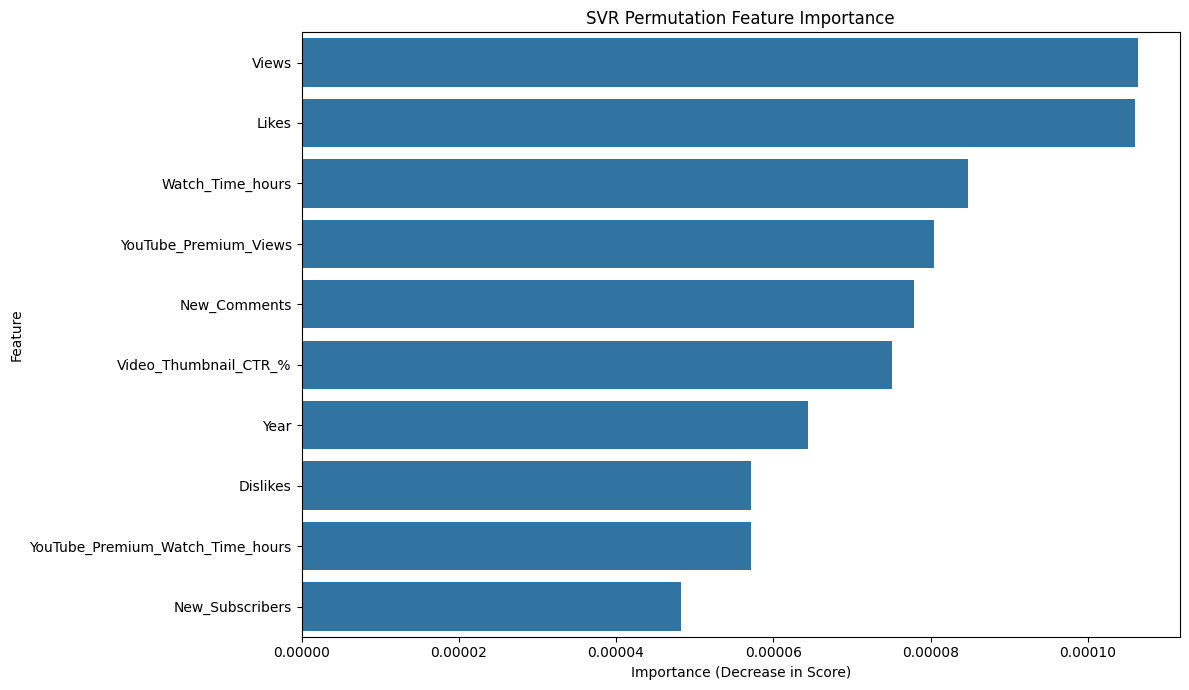

In [ ]:
# Cell 4: Support Vector Regressor (SVR) (Colab Compatible)

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import warnings

print("\n--- Running Support Vector Regressor (SVR) ---")

# Suppress ConvergenceWarning from SVR if it occurs often (can happen with complex data/small datasets)
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

# Scale numerical features for SVR (MANDATORY for SVM models)
scaler = StandardScaler()

# All columns in X_train are numerical after label encoding and NaN handling.
# So, we scale all features.
all_features_to_scale = X_train.columns.tolist()

X_train_scaled = scaler.fit_transform(X_train[all_features_to_scale])
X_test_scaled = scaler.transform(X_test[all_features_to_scale])

# Convert scaled arrays back to DataFrames for easier interpretation with feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=all_features_to_scale, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=all_features_to_scale, index=X_test.index)


# Initialize and train SVR
# You might need to tune 'C', 'gamma', and 'epsilon' parameters for optimal performance.
# 'rbf' (Radial Basis Function) kernel is a common choice for non-linear relationships.
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1) # Example parameters
svr_model.fit(X_train_scaled_df, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test_scaled_df)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR MSE: {mse_svr:.2f}")
print(f"SVR R-squared: {r2_svr:.2f}")

# To understand relations (feature importance) with SVR:
# SVR doesn't have direct feature importance like tree models. We use Permutation Importance.
print("\nCalculating SVR Permutation Feature Importance (This may take a moment)...")
result = permutation_importance(svr_model, X_test_scaled_df, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

feature_importances_svr = pd.DataFrame({
    'feature': X_test_scaled_df.columns[sorted_idx],
    'importance': result.importances_mean[sorted_idx],
    'std': result.importances_std[sorted_idx]
}).sort_values('importance', ascending=False)

print("\nSVR Permutation Feature Importance (Top 10):")
print(feature_importances_svr.head(10))

# Visualize Permutation Feature Importance
plt.figure(figsize=(12, 7))
sns.barplot(x='importance', y='feature', data=feature_importances_svr.head(10))
plt.title('SVR Permutation Feature Importance')
plt.xlabel('Importance (Decrease in Score)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# To understand relations:
# Permutation Importance indicates how much the model's performance decreases when a feature's values are randomly shuffled.
# A larger decrease implies that the feature is more important for the model's predictions.
# Check the importance of 'Ad_Impressions' and how other features contribute.

correlation matrix

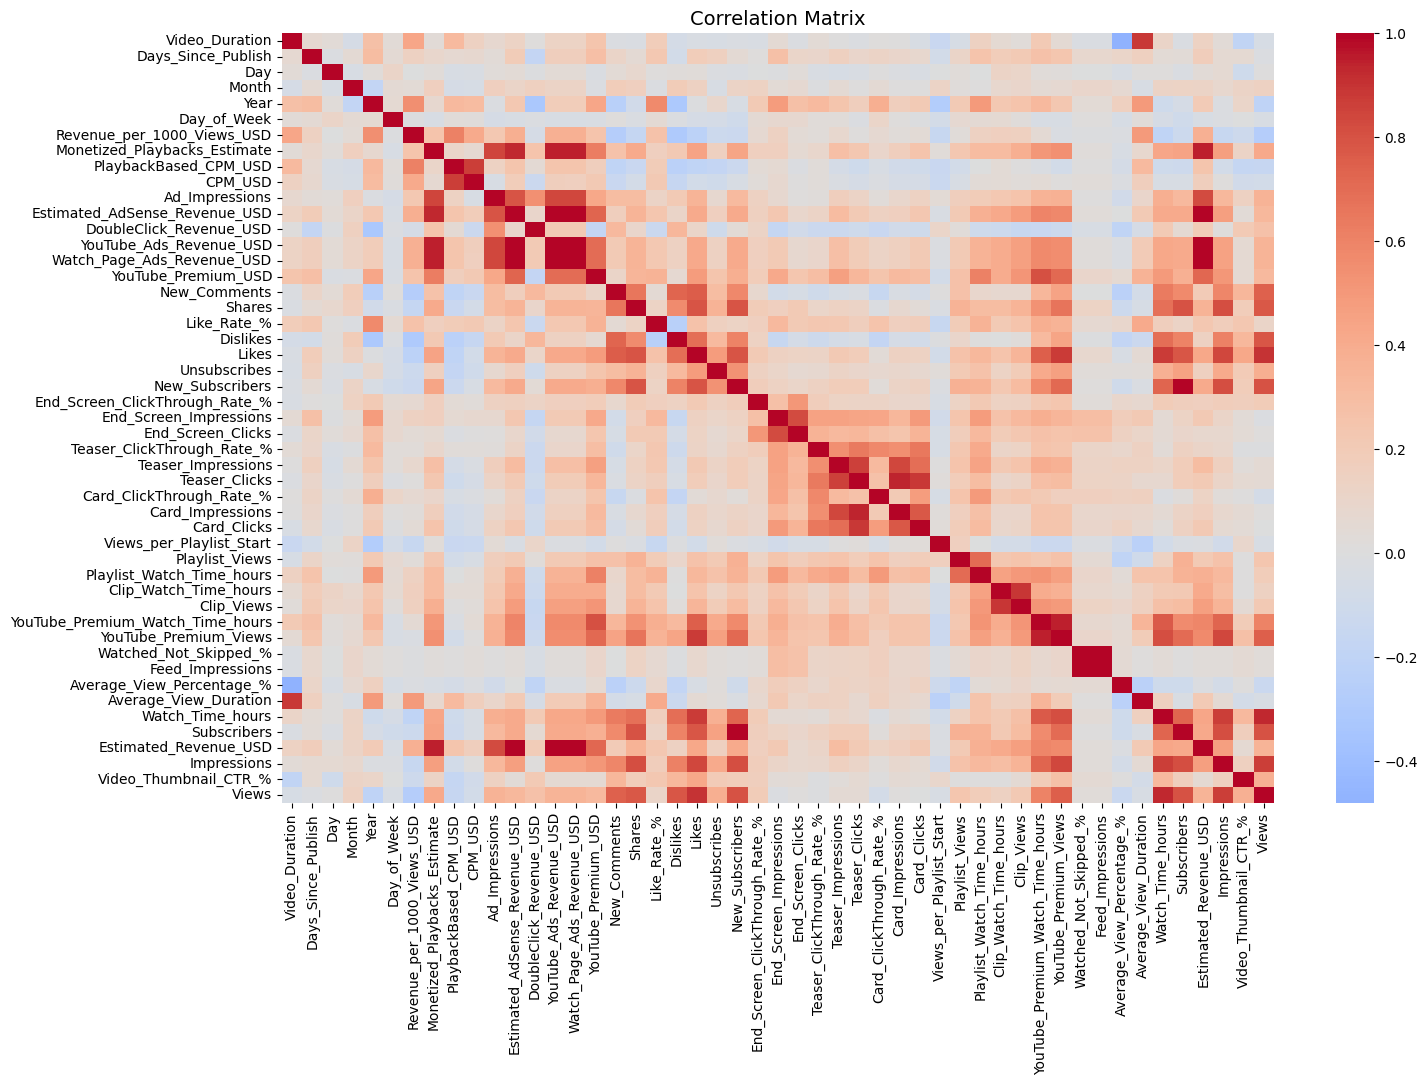


Correlation with Views:
Views                               1.000000
Watch_Time_hours                    0.931054
Likes                               0.899124
Impressions                         0.870877
Subscribers                         0.802406
New_Subscribers                     0.801499
Dislikes                            0.780940
Shares                              0.772284
YouTube_Premium_Views               0.746682
New_Comments                        0.741259
YouTube_Premium_Watch_Time_hours    0.603832
Monetized_Playbacks_Estimate        0.419564
Unsubscribes                        0.386644
Video_Thumbnail_CTR_%               0.377969
Ad_Impressions                      0.365138
Name: Views, dtype: float64

Correlation with Ad_Impressions:
Ad_Impressions                      1.000000
Monetized_Playbacks_Estimate        0.849579
Watch_Page_Ads_Revenue_USD          0.832940
YouTube_Ads_Revenue_USD             0.832923
Estimated_Revenue_USD               0.825534
Estimated_AdS

In [ ]:
# Correlation matrix for all features + target variables
plt.figure(figsize=(16,10))

# Use the preprocessed features X and the target variable y
# Concatenate X and y back together for the correlation matrix calculation
df_processed = pd.concat([X, y], axis=1)

corr = df_processed.corr()

sns.heatmap(corr, cmap='coolwarm', annot=False, center=0)
plt.title("Correlation Matrix", fontsize=14) # Updated title as it now includes all features and target
plt.show()

# Specifically see correlations with the target variable and Ad Impressions
print(f"\nCorrelation with {target_variable}:")
print(corr[target_variable].sort_values(ascending=False).head(15))

# Assuming 'Ad_Impressions' is still a relevant feature after preprocessing,
# check its correlation if it exists in the processed dataframe
if 'Ad_Impressions' in df_processed.columns:
    print("\nCorrelation with Ad_Impressions:")
    print(corr['Ad_Impressions'].sort_values(ascending=False).head(15))
else:
    print("\n'Ad_Impressions' column not found in the processed dataframe.")